# Body Performance

## Download the data
This is a data from kaggle's ["Body Performance"](https://www.kaggle.com/datasets/kukuroo3/body-performance-data), which provide 12 body performance features and a final body class level(A,B,C,D).

In [1]:
import pandas as pd
#read the data
data = pd.DataFrame(pd.read_csv('bodyPerformance.csv'))

## Preprocessing

### Missing Value
Using "missingno matrix" to visualize the missing data location.

You should consider upgrading via the 'c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

<Figure size 504x360 with 0 Axes>

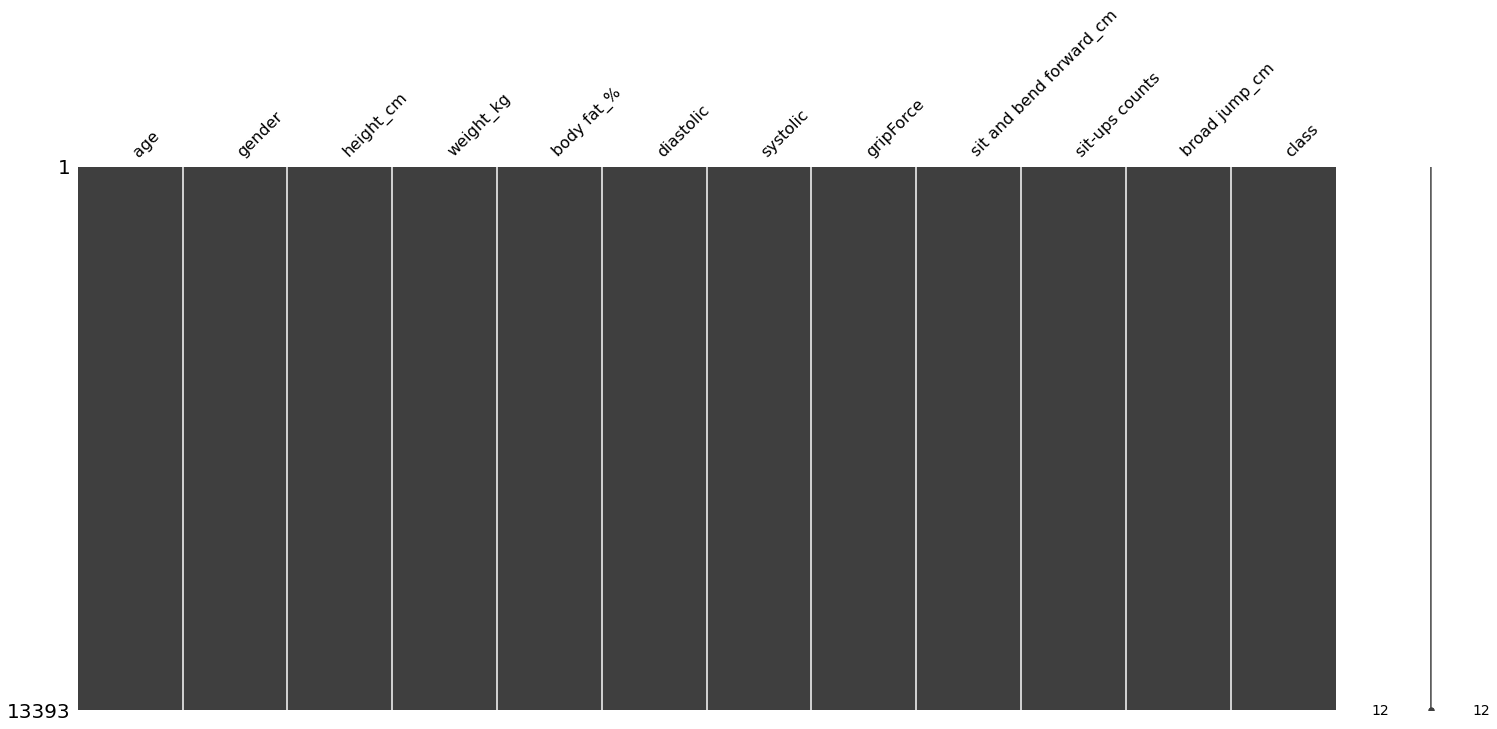

In [2]:
%pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
msno.matrix(data)

### Dummy Variable
Using "get_dummies" to vectorize the category data "gender", there is another way of doing this ["OneHotEncoder"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), it has different characteristic which will not discussed here.

In [3]:
genderdum = pd.get_dummies(data.gender)
genderdum.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Ordinal Targets
Replacing our class target [A,B,C,D] to ordinal numbers [1,2,3,4], can't see the difference between this and ["OrdinalEncoder"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

In [4]:
classord = data[['class']].replace(['A','B','C','D'],[1,2,3,4])
classord.head()

,class
0,3
1,1
2,3
3,2
4,2


### Reform Matrix
Reform the features matrix and the full matrix.

In [5]:
#drop gender and class first
datadrop = data.drop(['gender','class'], axis=1)

#concat the dummied gender
datafeature = pd.concat([genderdum,datadrop], axis=1)

#concat the ordinal targets
datafull = pd.concat([datafeature,classord],axis=1)
datafull.head()


,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,0,1,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,0,1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,0,1,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,0,1,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,0,1,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


### Outlier Detection
Use "tukey iqr" to detect the outlier, the value bigger than q3+1.5*iqr or smaller than q1-1.5*iqr will be seen as a outlier.

In [8]:
import numpy as np
def outdet(columns):
    q1 = np.percentile(columns,25)
    q3 = np.percentile(columns,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    roof = q3 + 1.5*iqr
    # new way to form a list
    outindex = list(columns.index[(columns < floor)|(columns > roof)])
    outvalue = list(columns[outindex])
    outlist = []
    for i in range(len(outvalue)):
        outlist.append([outindex[i],outvalue[i]])
    for i in outlist:
        if i[1] < floor:
            columns[i[0]] = floor
            # print(i[0],columns[i[0]])
        if i[1] > roof:
            columns[i[0]] = roof
            # print(i[0],columns[i[0]])

In [9]:
for _,i in datafull.iteritems():
    if _ != "F" and _ !="M" and _ != "class":
        outdet(i)

<ipython-input-8-21090eb834e1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns[i[0]] = floor
<ipython-input-8-21090eb834e1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns[i[0]] = roof


c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='sit and bend forward_cm'>

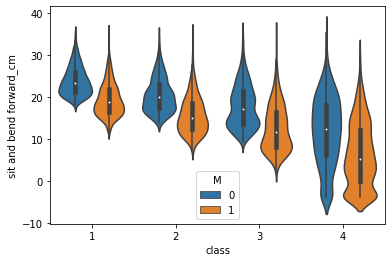

In [18]:
import seaborn as sns
sns.violinplot(datafull['class'],datafull['sit and bend forward_cm'],hue=datafull['M'])

c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='body fat_%'>

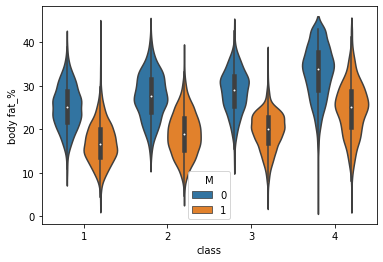

In [19]:
sns.violinplot(datafull['class'],datafull['body fat_%'],hue=datafull['M'])

c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='diastolic'>

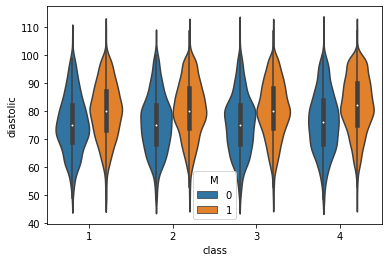

In [20]:
sns.violinplot(datafull['class'],datafull['diastolic'],hue=datafull['M'])